In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from os import listdir
from os.path import isfile, join
import pandas as pd
from PIL import ImageTk
from tkinter import *
from tkinter import filedialog
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split

# For the tree visualization
import pydot

# For the dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# For the logistic regression
from sklearn.linear_model import LogisticRegression

# For the tree models
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# For the confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

# For the Cross validation & Grid Search
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, GridSearchCV

# For Pipeline 
from sklearn.pipeline import Pipeline, FeatureUnion

#for ROC - AUC
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Binarizer
from termcolor import colored

def csv_drive_path_generatoer(url:str):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

%matplotlib inline

In [ ]:
path = csv_drive_path_generatoer(url = 'https://drive.google.com/file/d/1k1MkcPDH8hULRVDbuA3_vY_qO4lTD9bW/view?usp=sharing')
imgdetails = pd.read_csv(path)


print(imgdetails.info())
imgdetails.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Img_Name                   506 non-null    object
 1   Difficulty_Identification  506 non-null    object
 2   Skin                       506 non-null    object
dtypes: object(3)
memory usage: 12.0+ KB
None


,Img_Name,Difficulty_Identification,Skin
0,-car-seat-evolution-convertible-car-seat-with-...,normal,bright
1,0007_o4ldrift-sl04_72rgb_6302d053-af3c-4841-b4...,normal,dark
2,0596e769bae36e1a4ba89a88826c1b10--convertible-...,normal,bright
3,1-9.jpg,normal,bright
4,1028602-200x200.jpg,difficult,bright


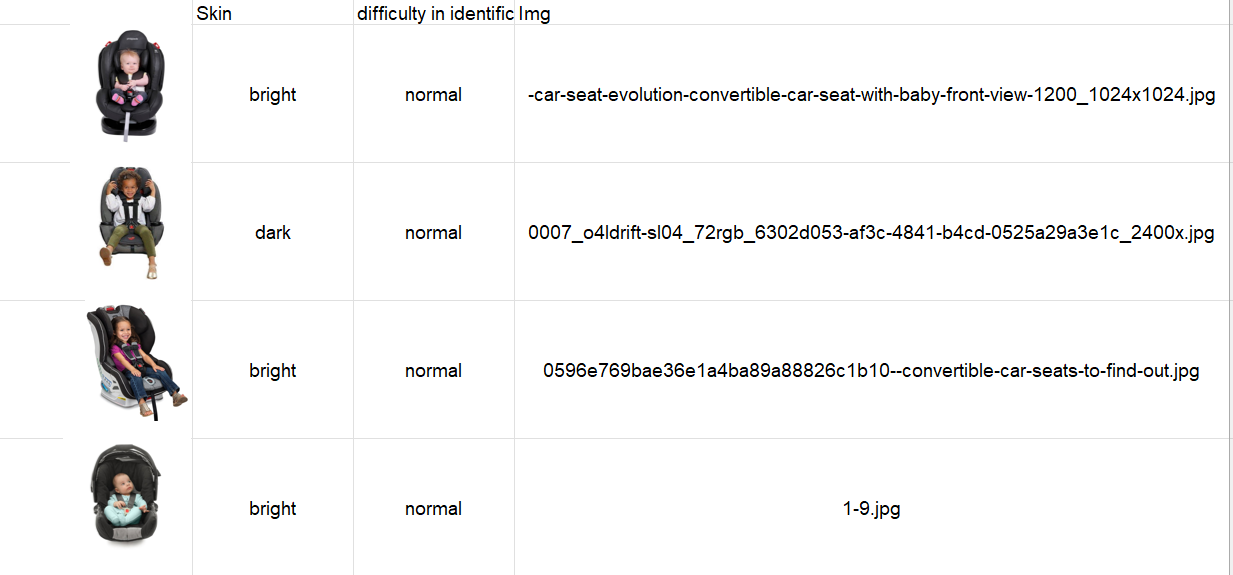

In [ ]:
#!pip install googledrivedownloader

#from google_drive_downloader import GoogleDriveDownloader as gdd

#gdd.download_file_from_google_drive(file_id='1ejtHpLaOT86BDsH2YNM6CxtoKslkrVq3',
#                                    dest_path='./Baby.zip')

In [ ]:
!pip install googledrivedownloader

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1FMvC0Xm2UxH9pc6ZOXvaHCmSd7jErWVF',
                                    dest_path='./Baby.zip')

In [ ]:
!unzip "./Baby.zip" -d "./"

Archive:  ./Baby.zip
  inflating: ./Baby/4momsWithBaby.jpg  
  inflating: ./Not_Baby/008-189_edited.webp  
  inflating: ./Not_Baby/112483_waverleytoyota-blog-infantcarseat-02.jpg  
  inflating: ./Not_Baby/112488_waverleytoyota-blog-infantcarseat-05.jpg  
  inflating: ./Not_Baby/1-500x500.png  
  inflating: ./Not_Baby/1624895067-cybex-aton-m-sensorsafe-infant-car-seat-1624895059.jpg  
  inflating: ./Not_Baby/201179.jpg   
  inflating: ./Not_Baby/227310-infantcarseats-babytrend-inertia.jpg  
  inflating: ./Not_Baby/380310.webp  
  inflating: ./Not_Baby/38a7383db144adb9dc5da9b6828fdb3c11d78a7eb25268a11fadf0433f1ad9d9.jpg  
  inflating: ./Not_Baby/39-802_s_1.jpg  
  inflating: ./Not_Baby/39-802_xxl_2.jpg  
  inflating: ./Not_Baby/399636-infant-car-seats-evenflo-gold-securemax-10011410.png  
  inflating: ./Not_Baby/41bGDWXBdBL.jpg  
  inflating: ./Not_Baby/41bQJQf2xTL.jpg  
  inflating: ./Not_Baby/41ecwdjhl4L._SR6002C315_PIWhiteStrip2CBottomLeft2C02C35_SCLZZZZZZZ_FMpng_BG2552C2552C255.jpg  

In [ ]:
def display_picture_size_save(booster_file_img,tsize,dfn,dir):

    image = Image.open(booster_file_img) 
    
    image = image.resize(tsize)
    image.thumbnail(tsize, Image.ANTIALIAS)  
    
    print(image.width, image.height,booster_file_img)
    pre, ext = os.path.splitext(booster_file_img)
    #image = image.convert('L') #convert to WB
    image = image.convert('RGB')
    image.save('./' + IMAGE_BABY_RDIR + '.jpg')
    #mylist=pd.DataFrame(np.asarray(image).reshape(-1,tsize[0] * 3 * tsize[1] )
    #mylist.append(booster_file_img)
    #df=dfn.append(mylist)
    df_tmp=pd.DataFrame(np.asarray(image).reshape(-1,tsize[0] * 3 * tsize[1] ))
    df_tmp['IMAGE_DIR']=booster_file_img
    return dfn.append(df_tmp)


  #  df=dfn.append(pd.DataFrame(np.asarray(image).reshape(-1,tsize[0] * 3 * tsize[1] )))
  #  df.at[-1,'IMAGE_DIR']=booster_file_img
  #  return df

    
    

IMAGE_BABY_DIR = r'./Baby'
IMAGE_NOTBABY_DIR = r'./Not_Baby'
IMAGE_BABY_RDIR = r'./Baby_Resized'
IMAGE_NOTBABY_RDIR = r'./Not_Baby_Resized'
list_tmp_baby = [ join(IMAGE_BABY_DIR, f) for f in listdir(IMAGE_BABY_DIR) if isfile(join(IMAGE_BABY_DIR, f))]
list_tmp_not_baby = [ join(IMAGE_NOTBABY_DIR, f) for f in listdir(IMAGE_NOTBABY_DIR) if isfile(join(IMAGE_NOTBABY_DIR, f))]

size = 50, 50

print(len(list_tmp_baby))

df_baby = pd.DataFrame()

for p in list_tmp_baby:
  df_baby = display_picture_size_save(p,size,df_baby,IMAGE_BABY_RDIR)

df_baby['Isbaby'] = 1

print(len(list_tmp_baby))

df_not_baby = pd.DataFrame()

for p in list_tmp_not_baby:
  df_not_baby = display_picture_size_save(p,size,df_not_baby,IMAGE_NOTBABY_RDIR )

df_not_baby['Isbaby'] = 0
df_not_baby.head()

df_babydataset=df_baby.append(df_not_baby)


506
50 50 ./Baby/image2.jpeg
50 50 ./Baby/images39.jpg
50 50 ./Baby/images40 (3).jpg
50 50 ./Baby/images527.jpg
50 50 ./Baby/images207.jpg
50 50 ./Baby/image4 (3).jpeg
50 50 ./Baby/images291.jpg
50 50 ./Baby/images139.jpg
50 50 ./Baby/9b41a3d60267429ea2478758e5592762.jpg
50 50 ./Baby/Picture-31.jpg
50 50 ./Baby/images50 (2).jpg
50 50 ./Baby/image9 (3).jpeg
50 50 ./Baby/bubble-carrycot-cum-carseat-18-sb-807-forward-facing-sunbaby-original-imaeva8ekfvfsrge.jpeg
50 50 ./Baby/image28.jpeg
50 50 ./Baby/images85.jpg
50 50 ./Baby/Capture.JPG
50 50 ./Baby/images279.jpg
50 50 ./Baby/s-l400.jpg
50 50 ./Baby/depositphotos_236856064-stock-photo-baby-boy-buckled-car-seat.jpg
50 50 ./Baby/images361.jpg
50 50 ./Baby/images48 (2).jpg
50 50 ./Baby/4momsWithBaby.jpg
50 50 ./Baby/f8ac974560d49a4c695f62c0f4e7fd7d--chicco-the-chair.jpg
50 50 ./Baby/image4 (7).jpeg
50 50 ./Baby/images12.jpg
50 50 ./Baby/image15.jpeg
50 50 ./Baby/How-to-Properly-Install-and-Secure-a-Child-Car-Seat.jpg
50 50 ./Baby/image17 (4

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50 50 ./Not_Baby/images185.jpg
50 50 ./Not_Baby/images600.jpg
50 50 ./Not_Baby/images486.jpg
50 50 ./Not_Baby/41bQJQf2xTL.jpg
50 50 ./Not_Baby/images46.jpg
50 50 ./Not_Baby/images524.jpg
50 50 ./Not_Baby/39-802_s_1.jpg
50 50 ./Not_Baby/images52.jpg
50 50 ./Not_Baby/images233.jpg
50 50 ./Not_Baby/images539.jpg
50 50 ./Not_Baby/images151.jpg
50 50 ./Not_Baby/images286.jpg
50 50 ./Not_Baby/images577.jpg
50 50 ./Not_Baby/images407.jpg
50 50 ./Not_Baby/images282.jpg
50 50 ./Not_Baby/images67.jpg
50 50 ./Not_Baby/images370.jpg
50 50 ./Not_Baby/images400.jpg
50 50 ./Not_Baby/81BOU66YBuL._SY450_.jpg
50 50 ./Not_Baby/815IlaIJarL._SL1500_.jpg
50 50 ./Not_Baby/images252.jpg
50 50 ./Not_Baby/de1429ea800547c63b953385fa60f75b02.jpg
50 50 ./Not_Baby/egg-shell-car-seat-base-p16199-100736_image.jpg
50 50 ./Not_Baby/images284.jpg
50 50 ./Not_Baby/images194.jpg
50 50 ./Not_Baby/sks18034_1_2_2.jpg
50 50 ./Not_Baby/images455.jpg
50 50 ./Not_Baby/images305.jpg
50 50 ./Not_Baby/sq01-b-1-500x500.JPG.jpg
50 50

In [ ]:
df_babydataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,IMAGE_DIR,Isbaby
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/image2.jpeg,1
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/images39.jpg,1
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,255,252,254,...,245,246,246,247,248,247,248,249,249,249,250,251,250,250,252,250,250,252,251,251,252,253,251,252,252,252,253,253,253,255,255,255,255,255,255,255,255,255,./Baby/images40 (3).jpg,1
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/images527.jpg,1
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,19,19,179,179,179,255,255,255,254,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Baby/images207.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Not_Baby/images113.jpg,0
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Not_Baby/images293.jpg,0
0,243,243,243,243,243,243,244,244,244,244,244,244,244,244,244,244,244,244,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,...,244,244,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,247,247,247,247,247,247,247,247,247,246,246,246,246,246,246,246,246,246,246,246,246,./Not_Baby/images676.jpg,0
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,./Not_Baby/images460.jpg,0


In [ ]:
df_babydataset.to_csv("babydataset50X50.csv")

# **EDA**

In [ ]:
df_babydataset.shape  

(1243, 7502)

In [ ]:
StartRow=df_babydataset.shape[0]
StartRow

1243

In [ ]:
columns_remove__duplicates=list(df_babydataset.columns)

In [ ]:
columns_remove__duplicates.remove('IMAGE_DIR')
columns_remove__duplicates.remove('Isbaby')

In [ ]:
df_babydataset = df_babydataset.drop_duplicates(columns_remove__duplicates, keep='last')

In [ ]:
Duplicates_Row=StartRow-df_babydataset.shape[0]
Duplicates_Row

156

In [ ]:
df_babydataset=df_babydataset.reset_index(drop=True)

In [ ]:
df_babydataset_image=df_babydataset['IMAGE_DIR']
df_babydataset_image=pd.DataFrame(df_babydataset_image)
df_babydataset=df_babydataset.drop('IMAGE_DIR',axis=1)

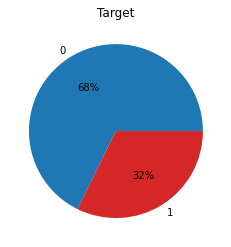

In [ ]:
import matplotlib.pyplot as plt

x = list(df_babydataset['Isbaby'].value_counts())
labels = list(df_babydataset['Isbaby'].value_counts().index)
colors = ['tab:blue', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Target')
plt.show()

# **Split data to train and test**

In [ ]:
x = df_babydataset.drop(columns = ['Isbaby'])
y = df_babydataset.Isbaby

In [ ]:
train, test = split(df_babydataset, train_size=0.8, random_state=12345)
x_train=train.drop(columns = ['Isbaby'])
x_test=test.drop(columns = ['Isbaby'])
y_train=train.Isbaby
y_test=test.Isbaby

In [ ]:
train[train['Isbaby']==1].shape[0]/train.shape[0]

0.31530494821634064

In [ ]:
test[test['Isbaby']==1].shape[0]/test.shape[0]

0.3532110091743119

# **DecisionTree with GridSearchCV**

In [ ]:
my_columns = x_train.loc[:,x_train.apply(pd.Series.nunique) != 1].columns


In [ ]:
#scaler = StandardScaler()
#rfc = RandomForestClassifier() 
#steps = [     
#         ('scaler', scaler),          
#         ('rfc', rfc)
#        ]
#param_grid = { 
#    'rfc__n_estimators': [200,700,1200],
#    'rfc__max_features': ['auto', 'sqrt', 'log2']
#            }
#         
#my_pipeline = Pipeline(steps)

#clf_gs = GridSearchCV(my_pipeline, param_grid, cv=5, n_jobs=10,verbose= 2)

#clf_gs.fit(x_train, y_train)


In [ ]:
#y_train_pred2 = clf_gs.predict(x_train)
#print(colored("Train Result:", 'green', attrs=['bold']))
#print(classification_report(y_train, y_train_pred2))
#y_test_pred2 = clf_gs.predict(x_test)
#print(colored("Test Result:", 'green', attrs=['bold']))
#print(classification_report(y_test, y_test_pred2))
#print(colored("Cross Validation Scores:", 'green', attrs=['bold']))
#print(clf_gs.cv_results_['mean_test_score'].mean())

In [ ]:
Incorrect_Results=pd.DataFrame(y_test)

In [ ]:
Incorrect_Results

,Isbaby
73,1
386,0
90,1
30,1
530,0
...,...
646,0
320,1
1069,0
183,1


In [ ]:
#Incorrect_Results["predict"]=y_test_pred2
#Incorrect_Results["Proper_prediction"]=Incorrect_Results["predict"]==Incorrect_Results["Isbaby"]
#Incorrect_Results=Incorrect_Results[Incorrect_Results["Proper_prediction"]==False]
#df_babydataset_image=pd.DataFrame(df_babydataset_image)
#Incorrect_Results['title']="Actual: "+Incorrect_Results['Isbaby'].astype(str)+" Predict: "+Incorrect_Results['predict'].astype(str)
#Incorrect_Results=Incorrect_Results.join(df_babydataset_image, lsuffix='_caller', rsuffix='_other')
#df_babydataset_image.loc[53]['IMAGE_DIR']==df_babydataset_image.loc[0]['IMAGE_DIR']
#df_babydataset_image.nunique()
#title_list=list(Incorrect_Results['title'])
#image_list=list(Incorrect_Results['IMAGE_DIR'])
#for x in range(len(image_list)):
#  im = Image.open(image_list[x])
#  plt.title(title_list[x])
#  plt.imshow(im)
#  plt.show()

In [ ]:
#Incorrect_Results["Proper_prediction"]=Incorrect_Results["predict"]==Incorrect_Results["Isbaby"]

In [ ]:
#Incorrect_Results=Incorrect_Results[Incorrect_Results["Proper_prediction"]==False]

In [ ]:
#df_babydataset_image=pd.DataFrame(df_babydataset_image)

In [ ]:
#Incorrect_Results['title']="Actual: "+Incorrect_Results['Isbaby'].astype(str)+" Predict: "+Incorrect_Results['predict'].astype(str)

In [ ]:
#Incorrect_Results=Incorrect_Results.join(df_babydataset_image, lsuffix='_caller', rsuffix='_other')

In [ ]:
#df_babydataset_image.loc[53]['IMAGE_DIR']==df_babydataset_image.loc[0]['IMAGE_DIR']

In [ ]:
#df_babydataset_image.nunique()

In [ ]:
#title_list=list(Incorrect_Results['title'])
#image_list=list(Incorrect_Results['IMAGE_DIR'])

In [ ]:
#for x in range(len(image_list)):
#  im = Image.open(image_list[x])
#  plt.title(title_list[x])
#  plt.imshow(im)
#  plt.show()



# **model2- CNN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import sample
from numpy.random import rand, shuffle

import string
import re
from unicodedata import normalize
from numpy import array

from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, LSTM, RepeatVector, TimeDistributed, Embedding
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint

# random seeds must be set before importing keras & tensorflow
my_seed = 512
np.random.seed(my_seed)
import random 
random.seed(my_seed)

from IPython.display import Image
from IPython.core.display import HTML 

In [ ]:
img_rows, img_cols = size
num_classes=2

In [ ]:
X_train=x_train
X_test=x_test

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
Y_train=y_train
Y_test=y_test


In [ ]:
size[0]*size[1]*3

7500

wikipedia

In [ ]:
size

(50, 50)

In [ ]:
lst=[]
for i in range(X_train.shape[0]):
  img=X_train.iloc[i,0:size[0]*size[1]*3].to_numpy()
  img = img.reshape(size[0],size[1],3)
  lst.append(img)
X_train_arr = np.array(lst)

In [ ]:
lst=[]
for i in range(X_test.shape[0]):
  img=X_test.iloc[i,0:size[0]*size[1]*3].to_numpy()
  img = img.reshape(size[0],size[1],3)
  lst.append(img)
X_test_arr = np.array(lst)

In [ ]:
X_train_arr.shape

(869, 50, 50, 3)

In [ ]:
X_train_arr
type(X_train_arr)

numpy.ndarray

In [ ]:
X_train_arr.shape[1]

50

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
model = Sequential(name="classifier")

#model.add(Conv2D(64, kernel_size=3, strides=5, input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1), padding='same'))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.3))

model.add(Dense(400, activation='relu',input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1)))
model.add(Dense(800, activation='relu'))

model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))


model.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))


model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50, 50, 3, 400)    800       
                                                                 
 dense_1 (Dense)             (None, 50, 50, 3, 800)    320800    
                                                                 
 conv2d (Conv2D)             (None, 50, 25, 2, 128)    921728    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 25, 2, 128)    0         
                                                                 
 dropout (Dropout)           (None, 50, 25, 2, 128)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 13, 1, 128)    409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 13, 1, 128)    0

In [ ]:
# compiling the sequential model
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
#model.fit(X_train_arr, Y_train, batch_size=10, epochs=3, validation_data=(X_test_arr, Y_test))

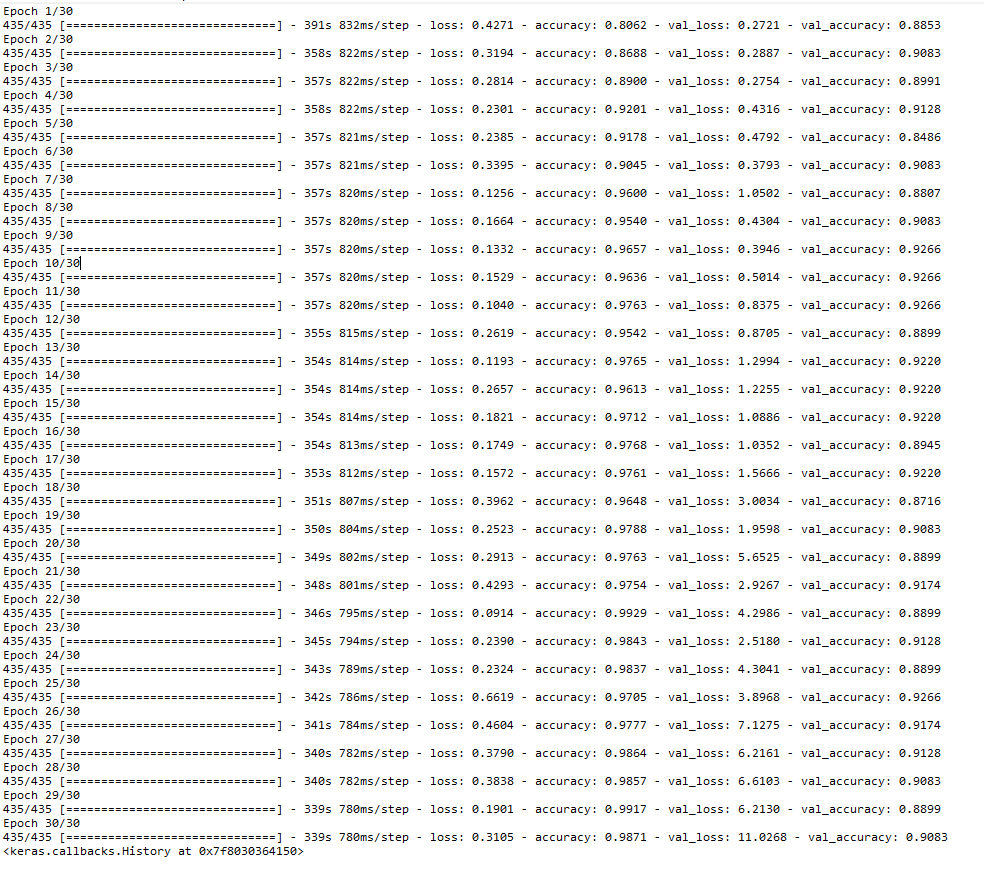


# `Augmenting the Images`

In [ ]:
from PIL import Image
from numpy import asarray
#fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))

def convert_bw(img_arr):
  arr_tmp = img_arr*255
  img_tmp = Image.fromarray(arr_tmp.astype(np.uint8)).convert('L').convert('RGB')
  #ax[i].imshow(img_tmp)
  return asarray(img_tmp).astype('float32')/255 
  #ax[i].imshow(arr_tmp)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline


from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

In [ ]:
final_train_data = []
final_target_train = []
for i in tqdm(range(X_train_arr.shape[0])):
    final_train_data.append(X_train_arr[i])
    final_train_data.append(rotate(X_train_arr[i], angle=45, mode = 'wrap'))
    final_train_data.append(np.fliplr(X_train_arr[i]))
    final_train_data.append(np.flipud(X_train_arr[i]))
    final_train_data.append(random_noise(X_train_arr[i],var=0.2**2))
    final_train_data.append(convert_bw(X_train_arr[i]))
    for j in range(5):
        final_target_train.append(Y_train[i])

100%|██████████| 869/869 [00:01<00:00, 457.95it/s]


In [ ]:
len(final_target_train), len(final_train_data)
final_train = np.array(final_train_data)
final_target_train = np.array(final_target_train)

In [ ]:
len(final_target_train), len(final_train_data)

(4345, 5214)

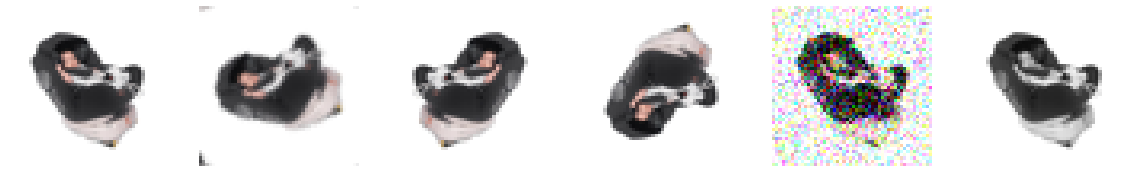

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(20,20))

for i in range(6):    
    ax[i].imshow(final_train[i+30])
    ax[i].axis('off')

In [ ]:
final_train.shape[0], final_train.shape[1], final_train.shape[2], final_train.shape[3]

(5214, 50, 50, 3)

In [ ]:
final_train.shape

(4345, 50, 50, 3)

In [ ]:
#final_train,final_target_train

# *** CNN Model Best model

In [ ]:
model = Sequential(name="classifier")

model.add(Conv2D(64, kernel_size=10, strides=2, input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1), padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Dense(200, activation='relu'))


model.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))


model.add(Conv2D(128, kernel_size=7, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Dense(300))

model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))

model.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 25, 2, 64)     6464      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 50, 25, 2, 64)     0         
                                                                 
 dropout_4 (Dropout)         (None, 50, 25, 2, 64)     0         
                                                                 
 dense_4 (Dense)             (None, 50, 25, 2, 200)    13000     
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 13, 1, 128)    640128    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 50, 13, 1, 128)    0         
                                                                 
 dropout_5 (Dropout)         (None, 50, 13, 1, 128)    0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# initialize the number of epochs and batch size
EPOCHS = 30
BS = 32
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the network
history =model.fit_generator(aug.flow(final_train, final_target_train, batch_size=BS),
	       validation_data=(X_test_arr, Y_test),
        	epochs=EPOCHS)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/30
136/136 [==============================] - 52s 337ms/step - loss: 0.5285 - accuracy: 0.7367 - val_loss: 0.4184 - val_accuracy: 0.7798
Epoch 2/30
136/136 [==============================] - 43s 313ms/step - loss: 0.4153 - accuracy: 0.8051 - val_loss: 0.3279 - val_accuracy: 0.8486
Epoch 3/30
136/136 [==============================] - 42s 311ms/step - loss: 0.3684 - accuracy: 0.8387 - val_loss: 0.2761 - val_accuracy: 0.8761
Epoch 4/30
136/136 [==============================] - 42s 311ms/step - loss: 0.3418 - accuracy: 0.8578 - val_loss: 0.3807 - val_accuracy: 0.8716
Epoch 5/30
136/136 [==============================] - 42s 312ms/step - loss: 0.3240 - accuracy: 0.8670 - val_loss: 0.2095 - val_accuracy: 0.9083
Epoch 6/30
136/136 [==============================] - 42s 312ms/step - loss: 0.2421 - accuracy: 0.9063 - val_loss: 0.1629 - val_accuracy: 0.9358
Epoch 7/30
136/136 [==============================] - 43s 313ms/step - loss: 0.2202 - accuracy: 0.9167 - val_loss: 0.1275 - val_ac

In [ ]:
EPOCHS=5
history =model.fit_generator(aug.flow(final_train, final_target_train, batch_size=BS),
	       validation_data=(X_test_arr, Y_test),
        	epochs=EPOCHS)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
136/136 [==============================] - 43s 316ms/step - loss: 0.1445 - accuracy: 0.9535 - val_loss: 0.0975 - val_accuracy: 0.9817
Epoch 2/5
136/136 [==============================] - 43s 317ms/step - loss: 0.1271 - accuracy: 0.9558 - val_loss: 0.2126 - val_accuracy: 0.9633
Epoch 3/5
136/136 [==============================] - 43s 314ms/step - loss: 0.1339 - accuracy: 0.9567 - val_loss: 0.0825 - val_accuracy: 0.9908
Epoch 4/5
136/136 [==============================] - 42s 311ms/step - loss: 0.1209 - accuracy: 0.9602 - val_loss: 0.1207 - val_accuracy: 0.9771
Epoch 5/5
136/136 [==============================] - 42s 311ms/step - loss: 0.1312 - accuracy: 0.9535 - val_loss: 0.0420 - val_accuracy: 0.9862


In [ ]:
y_test_pred2=model.predict(X_test_arr)

In [ ]:
Y_test.shape

(218, 2)

In [ ]:
a=pd.DataFrame(np.round(y_test_pred2, 0))

In [ ]:
a[1]

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
213    0.0
214    1.0
215    0.0
216    1.0
217    0.0
Name: 1, Length: 218, dtype: float32

In [ ]:
Incorrect_Results

,Isbaby,predict,Proper_prediction,title,IMAGE_DIR_caller,IMAGE_DIR_other
73,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/d72544aaa873c4a1be198d482104dcab.jpg,./Baby/d72544aaa873c4a1be198d482104dcab.jpg
386,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images68.jpg,./Not_Baby/images68.jpg
90,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/janC3A9-racing_6565-6756a35.jpg,./Baby/janC3A9-racing_6565-6756a35.jpg
530,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images194.jpg,./Not_Baby/images194.jpg
875,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images480.jpg,./Not_Baby/images480.jpg
...,...,...,...,...,...,...
646,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images32.jpg,./Not_Baby/images32.jpg
320,1,NaN,False,Actual: 1 Predict: nan,./Baby/images358.jpg,./Baby/images358.jpg
1069,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/image.jpeg,./Not_Baby/image.jpeg
183,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/images20.jpg,./Baby/images20.jpg


In [ ]:
df_babydataset_image

,IMAGE_DIR
0,./Baby/images527.jpg
1,./Baby/images207.jpg
2,./Baby/image4 (3).jpeg
3,./Baby/images291.jpg
4,./Baby/images139.jpg
...,...
1082,./Not_Baby/images113.jpg
1083,./Not_Baby/images293.jpg
1084,./Not_Baby/images676.jpg
1085,./Not_Baby/images460.jpg


In [ ]:
Incorrect_Results["predict"]=a[1]
Incorrect_Results

,Isbaby,predict,Proper_prediction,title,IMAGE_DIR_caller,IMAGE_DIR_other
73,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/d72544aaa873c4a1be198d482104dcab.jpg,./Baby/d72544aaa873c4a1be198d482104dcab.jpg
386,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images68.jpg,./Not_Baby/images68.jpg
90,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/janC3A9-racing_6565-6756a35.jpg,./Baby/janC3A9-racing_6565-6756a35.jpg
530,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images194.jpg,./Not_Baby/images194.jpg
875,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images480.jpg,./Not_Baby/images480.jpg
...,...,...,...,...,...,...
646,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images32.jpg,./Not_Baby/images32.jpg
320,1,NaN,False,Actual: 1 Predict: nan,./Baby/images358.jpg,./Baby/images358.jpg
1069,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/image.jpeg,./Not_Baby/image.jpeg
183,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/images20.jpg,./Baby/images20.jpg


In [ ]:

Incorrect_Results["predict"]=a[1]
Incorrect_Results["Proper_prediction"]=Incorrect_Results["predict"]==Incorrect_Results["Isbaby"]
Incorrect_Results=Incorrect_Results[Incorrect_Results["Proper_prediction"]==False]
df_babydataset_image=pd.DataFrame(df_babydataset_image)
Incorrect_Results['title']="Actual: "+Incorrect_Results['Isbaby'].astype(str)+" Predict: "+Incorrect_Results['predict'].astype(str)
Incorrect_Results=Incorrect_Results.join(df_babydataset_image, lsuffix='_caller', rsuffix='_other')
df_babydataset_image.loc[53]['IMAGE_DIR']==df_babydataset_image.loc[0]['IMAGE_DIR']
df_babydataset_image.nunique()
title_list=list(Incorrect_Results['title'])
image_list=list(Incorrect_Results['IMAGE_DIR'])
for x in range(len(image_list)):
  im = Image.open(image_list[x])
  plt.title(title_list[x])
  plt.imshow(im)
  plt.show()

KeyError: ignored

In [ ]:
Incorrect_Results

,Isbaby,predict,Proper_prediction,title,IMAGE_DIR_caller,IMAGE_DIR_other
73,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/d72544aaa873c4a1be198d482104dcab.jpg,./Baby/d72544aaa873c4a1be198d482104dcab.jpg
386,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images68.jpg,./Not_Baby/images68.jpg
90,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/janC3A9-racing_6565-6756a35.jpg,./Baby/janC3A9-racing_6565-6756a35.jpg
530,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images194.jpg,./Not_Baby/images194.jpg
875,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images480.jpg,./Not_Baby/images480.jpg
...,...,...,...,...,...,...
646,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/images32.jpg,./Not_Baby/images32.jpg
320,1,NaN,False,Actual: 1 Predict: nan,./Baby/images358.jpg,./Baby/images358.jpg
1069,0,NaN,False,Actual: 0 Predict: nan,./Not_Baby/image.jpeg,./Not_Baby/image.jpeg
183,1,0.0,False,Actual: 1 Predict: 0.0,./Baby/images20.jpg,./Baby/images20.jpg


In [ ]:
image_list=list(Incorrect_Results['IMAGE_DIR_other'])
for x in range(len(image_list)):
  im = Image.open(image_list[x])
  plt.title(title_list[x])
  plt.imshow(im)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

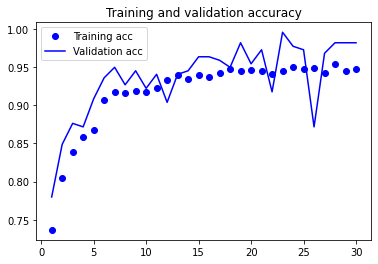

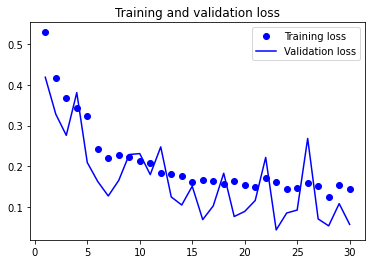

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

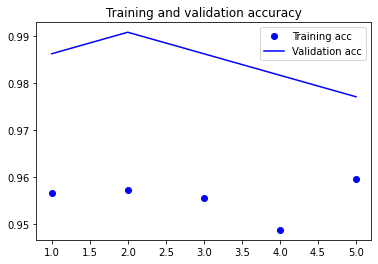

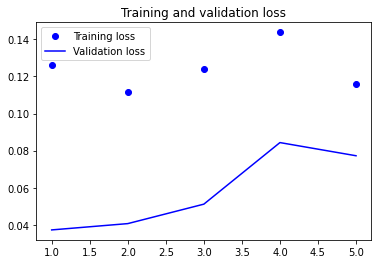

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

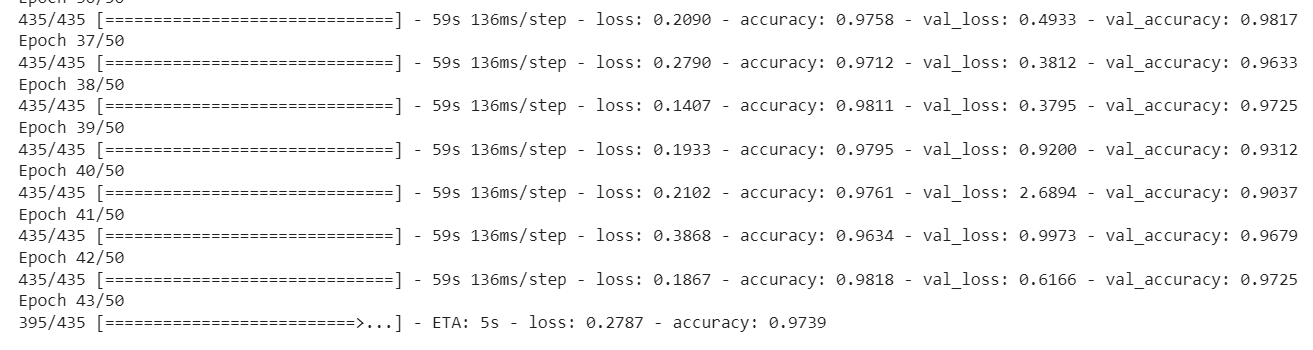

In [ ]:
!pip install pyyaml h5py 

In [ ]:
model.save_weights('./checkpoints/my_checkpoint20211230')

In [ ]:
model.save('cnn20211230.h5')

In [ ]:
final_train_reshape=pd.DataFrame(np.asarray(final_train).reshape(-1,size[0] * 3 * size[1] ))

In [ ]:
final_target_train_reshape=pd.DataFrame(np.asarray(final_target_train))
final_target_train_reshape=final_target_train_reshape[1]

In [ ]:
from mxnet import np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

net = nn.Sequential()
# Here, we use a larger 11 x 11 window to capture objects. At the same time,
# we use a stride of 4 to greatly reduce the height and width of the output.
# Here, the number of output channels is much larger than that in LeNet
net.add(Conv2D(64, kernel_size=2, strides=5, input_shape=(1,50,50,3), padding='same'))
net.add(nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
net.nn.MaxPool2D(pool_size=3, strides=2)
        # Make the convolution window smaller, set padding to 2 for consistent
        # height and width across the input and output, and increase the
        # number of output channels
net.nn.Conv2D(256, kernel_size=5, padding=2, activation='relu', padding='same'))
net.nn.MaxPool2D(pool_size=3, strides=2)
        # Use three successive convolutional layers and a smaller convolution
        # window. Except for the final convolutional layer, the number of
        # output channels is further increased. Pooling layers are not used to
        # reduce the height and width of input after the first two
        # convolutional layers
net.nn.Conv2D(384, kernel_size=3, padding=1, activation='relu')
net.nn.Conv2D(384, kernel_size=3, padding=1, activation='relu')
net.nn.Conv2D(256, kernel_size=3, padding=1, activation='relu')
net.nn.MaxPool2D(pool_size=3, strides=2),
        # Here, the number of outputs of the fully-connected layer is several
        # times larger than that in LeNet. Use the dropout layer to mitigate
        # overfitting
net.nn.Dense(4096, activation='relu'), nn.Dropout(0.5)
net.nn.Dense(4096, activation='relu'), nn.Dropout(0.5)
        # Output layer. Since we are using Fashion-MNIST, the number of
        # classes is 10, instead of 1000 as in the paper
net.add(Flatten())
net.add(Dense(2, activation='sigmoid'))
#net.nn.Dense(2))

In [ ]:
model3 = Sequential(name="classifier")

model3.add(Conv2D(64, kernel_size=10, strides=2, input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1), padding='same'))
model3.add(Conv2D(96, kernel_size=10, strides=4, activation='relu',padding='same'))
# Make the convolution window smaller, set padding to 2 for consistent
# height and width across the input and output, and increase the
# number of output channels
model3.add(Conv2D(256, kernel_size=5, padding=2, activation='relu' , padding='same'))
model3.add(MaxPool2D(pool_size=3, strides=2))
# Use three successive convolutional layers and a smaller convolution
# window. Except for the final convolutional layer, the number of
# output channels is further increased. Pooling layers are not used to
# reduce the height and width of input after the first two
# convolutional layers
model3.add(Conv2D(384, kernel_size=3, padding=1, activation='relu'))
model3.add(Conv2D(384, kernel_size=3, padding=1, activation='relu'))
model3.add(Conv2D(256, kernel_size=3, padding=1, activation='relu'))
model3.add(MaxPool2D(pool_size=3, strides=2))
# Here, the number of outputs of the fully-connected layer is several
# times larger than that in LeNet. Use the dropout layer to mitigate
# overfitting
model3.add(Dense(4096, activation='relu'), nn.Dropout(0.5))
model3.add(Dense(4096, activation='relu'), nn.Dropout(0.5))
# Output layer. Since we are using Fashion-MNIST, the number of
# classes is 10, instead of 1000 as in the paper
model3.add(Flatten())
model3.add(Dense(2, activation='sigmoid'))

In [ ]:
from tensorflow.keras.layers import BatchNormalization


In [ ]:
final_train.shape

In [ ]:
X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1

# alexnet

In [ ]:
model = Sequential()
  
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3]), 
            kernel_size = (11, 11), strides = (4, 4), 
            padding = 'same'))
model.add(Activation('relu'))
# Max-Pooling 
model.add(MaxPooling2D(pool_size = (2, 2),
            strides = (2, 2), padding = 'same'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11), 
            strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
  
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3), 
            strides = (1, 1), padding = 'same'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), 
            padding = 'same'))
# Batch Normalisation
model.add(BatchNormalization())
  
# Flattening
model.add(Flatten())
  
# 1st Dense Layer
model.add(Dense(4096, input_shape = (50*50*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
  
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
  
# Output Softmax Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(final_train, final_target_train, batch_size=10, epochs=30, validation_data=(X_test_arr, Y_test))

In [ ]:
model.save_weights('./checkpoints/my_checkpoint2')
model.save('partly_trained2.h5')

In [ ]:
net.fit(final_train, final_target_train, batch_size=10, epochs=60, validation_data=(X_test_arr, Y_test))

In [ ]:
final_train.shape

In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, final_train, final_target_train, num_epochs, lr, d2l.try_gpu())

In [ ]:
# compiling the sequential model
net.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
net.fit(final_train, final_target_train, batch_size=10, epochs=60, validation_data=(X_test_arr, Y_test))

# RandomForest with grid sarch

In [ ]:
scaler = StandardScaler()
rfc = RandomForestClassifier() 
steps = [     
         ('scaler', scaler),          
         ('rfc', rfc)
        ]
param_grid = { 
    'rfc__n_estimators': [200,700,1000],
 #   'rfc__max_features': ['auto']
    'rfc__max_features': ['auto', 'sqrt']
}
         
my_pipeline = Pipeline(steps)

clf_gs = GridSearchCV(my_pipeline, param_grid, cv=5, n_jobs=10,verbose= 2)

clf_gs.fit(final_train_reshape, final_target_train_reshape)


In [ ]:
y_train_pred5 = clf_gs.predict(final_train_reshape)
print(colored("Train Result:", 'green', attrs=['bold']))
print(classification_report(final_target_train_reshape, y_train_pred5))
y_test_pred5 = clf_gs.predict(x_test/255)
print(colored("Test Result:", 'green', attrs=['bold']))
print(classification_report(test.Isbaby, y_test_pred5))
print(colored("Cross Validation Scores:", 'green', attrs=['bold']))
print(clf_gs.cv_results_['mean_test_score'].mean())

CNN with Gridsarch

In [ ]:
from time import time
def create_model(optimizer='rmsprop', init='glorot_uniform'):
  model =Sequential(name="classifier")
	# create model
  model.add(Conv2D(64, kernel_size=10, strides=2, input_shape=(X_train_arr.shape[1],X_train_arr.shape[2],X_train_arr.shape[3],1), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.3))

  model.add(Dense(400, activation='relu'))


  model.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.3))


  #model.add(Conv2D(128, kernel_size=15, strides=2, padding='same'))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(Dropout(0.3))


  model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.3))

  model.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(2, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

start= time()
model = KerasClassifier(build_fn=create_model,verbose=2)
n_iter_search = 16 # Number of parameter settings that are sampled.
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150])
batches = np.array([5, 10, 20])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)

random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid,
                                   n_iter=n_iter_search)

random_search.fit(X_train_arr, y_train)


print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
print("total time:",time()-start)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

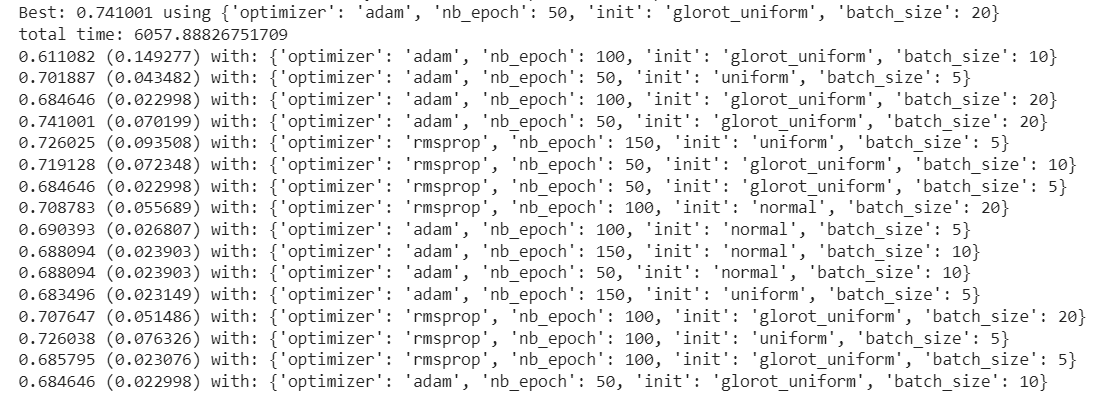

In [ ]:
# Create a new model by extracting layers from the original model:
extracted_layers = pretrained_model.layers[:-1]
extracted_layers.append(keras.layers.Dense(5, name="dense_3"))
model = keras.Sequential(extracted_layers)
model.summary()

In [ ]:
def create_functional_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = keras.layers.Dense(10, name="predictions")(x)
    return keras.Model(inputs=inputs, outputs=outputs, name="3_layer_mlp")


functional_model = create_functional_model()
functional_model.save_weights("partly_trained.h5")

# In a separate program:
pretrained_model = create_functional_model()
pretrained_model.load_weights("partly_trained.h5")

# Create a new model by extracting layers from the original model:
extracted_layers = pretrained_model.layers[:-1]
extracted_layers.append(keras.layers.Dense(5, name="dense_3"))
model = keras.Sequential(extracted_layers)
model.summary()